  # CHURN ANALYSIS
CONTENT
>CHAPTER 1
* INTRODUCTION
* OBJECTIVE
*REASON
*BENIFITES

>CHAPTER 2	
* DATA DESCRIPTION AND ANALYSIS (EDA) 
 * 2.1 Variable Description
 * 2.2 Dataset Loading and basic statics
 * 2.3 Visualizing Data
 * 2.4 Univariate Analysis
 * 2.5 Bivariate Analysis
 * 2.6 Multivariate analysis
 * 2.7 Pair plot
 
 > CHAPTER 3
 * Distribution of Data
   * 3.1 Computing Confidence interval and Histogram 
   * Ststistics test (ks test) 
   * Plotting KDE and Q-Q plot

>CHAPTER 4

  * Data Pre-processing Standardization

>CHAPTER 5
  * Modelling Data with Machine Learning  algorithm

> CHAPTER 6

  * Model Performance Evaluation

>CHAPTER 7
  * Parameter Tunning and Performance Evaluation
  * 7.1 Logistic Regression hyper-parameter tunning
  * 7.2 PCA and Random Forest Implementation
  * 7.3 RandomForest HyperParameter tunning

>CHAPTER 8
  * Neural network Implementation

  * 8.1 Building Models of neural network
  * 8.2 Visualizing the model
  * 8.3 Performance Evaluation in Neural Network
  * 8.4 Visualizing Accuracy and Loss



















































































  




  # CHAPTER 1

---



INTRODUCTION

The objective of this project is to predict which bank customers will churn by means of machine learning modelling techniques.

It is strategically important for companies to manage relationships with their customers,in order to increase their revenues.In business "customer relationship management"(CRM) therefore aims at ensuring customers satisfaction.The compnies tries to successfully apply CRM to their business in order to improve their retention power.

This technique led comapnies to identify with adequate advance which clients will leave and thereby can take necessary measure to prevent churn. 





  # CHAPTER 2

---



DATA DESCRIPTION AND ANALYSIS (EDA)


2.1 Information about the variables and their types in the data
* Surname : The surname of the customer
* CreditScore : The credit score of the customer
* Geography : The country of the customer(Germany/France/Spain)
* Gender : The gender of the customer (Female/Male)
* Age : The age of the customer
* Tenure : The customer's number of years in the in the bank
* Balance : The customer's account balance
* NumOfProducts : The number of bank products that the customer uses
* HasCrCard : Does the customer has a card? (0=No,1=Yes)
* IsActiveMember : Does the customer has an active mebership (0=No,1=Yes)
* EstimatedSalary : The estimated salary of the customer
* Exited : Churned or not? (0=No,1=Yes)

2.2 Dataset loading and basic stats

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#IMPORT FILES FROM DRIVE INTO GOOGLE-COLAB:

#STEP-1: Import Libraries

# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [6]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [7]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'19NVxVEhM_aP_l3wzpoRo-vVG0WDi-e_K'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Churn_Modelling.csv') 

In [8]:
df=pd.read_csv('Churn_Modelling.csv')

In [9]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.shape

(10000, 14)

* The data has 10000 rows( sample point) and 14 column(features)








* All feature columns name has been shown below

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

* The summary about dataframe which includes list of all columns with their data types and the number of non-null values in each column. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

* So geography can be made a categorical variable for analysis.

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


2.3 
DATA VISUALLIZATION

* Visualizing missing data

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

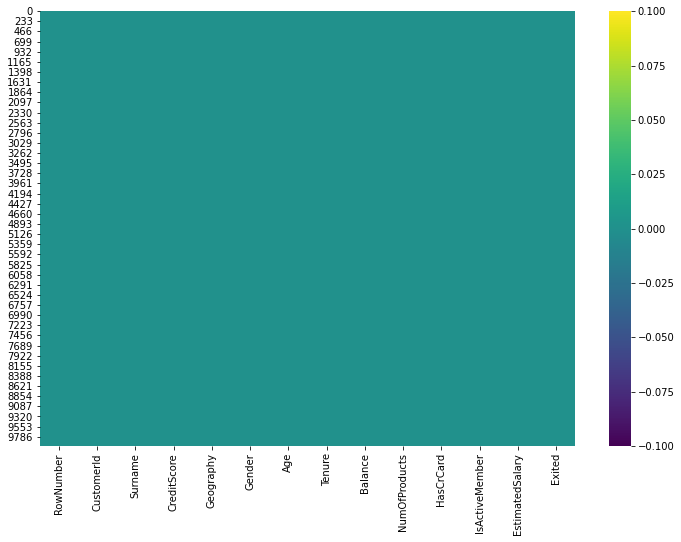

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='viridis')

The above heatmap shows that there is no missing data present.

* Outliers visualization of different feature
> 2.4 Univariate Analysis

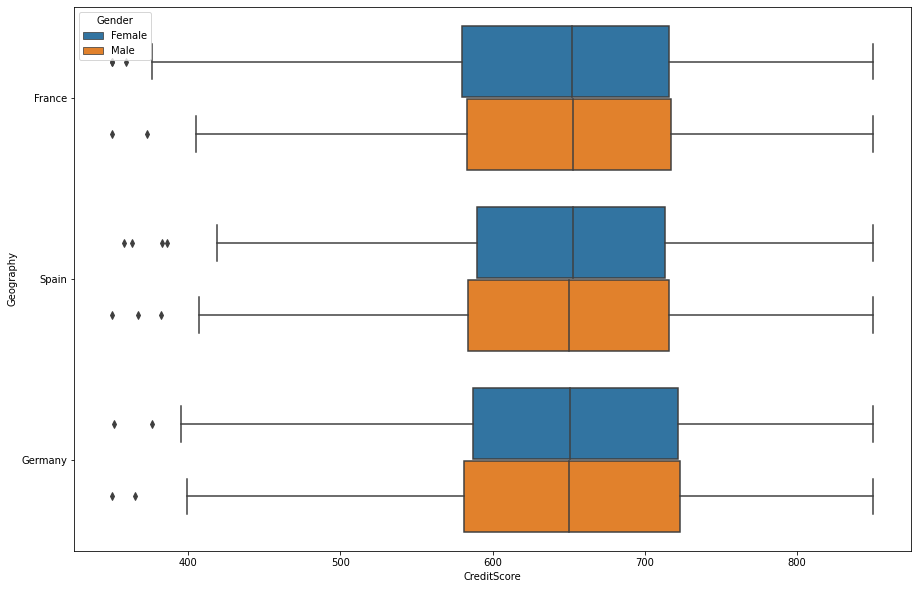

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x='CreditScore',y='Geography',hue='Gender')

* So it can be seen that Creditscore has lowerouter fence outliers and it is less in number.

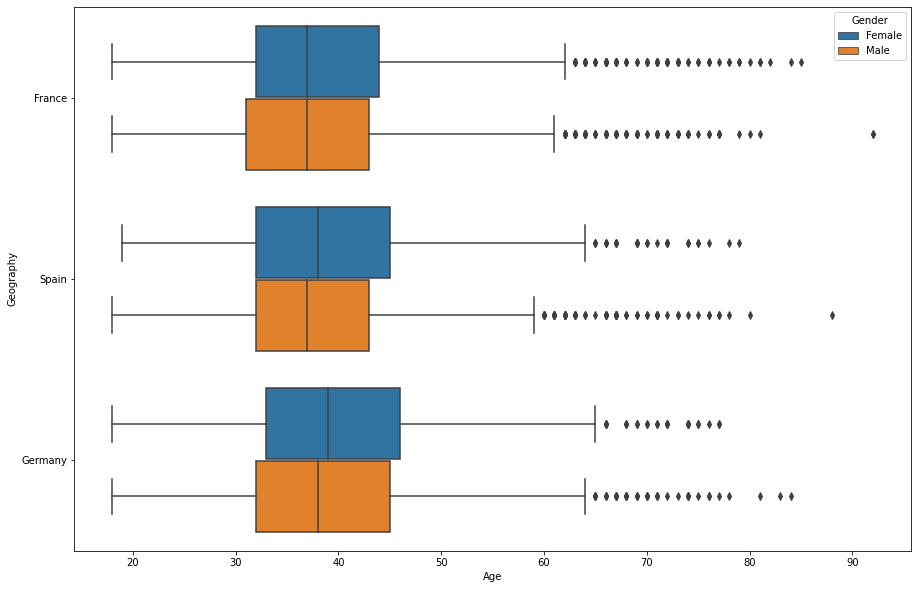

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x='Age',y='Geography',hue='Gender')

* Age category has outer fence outliers and it is more in number.

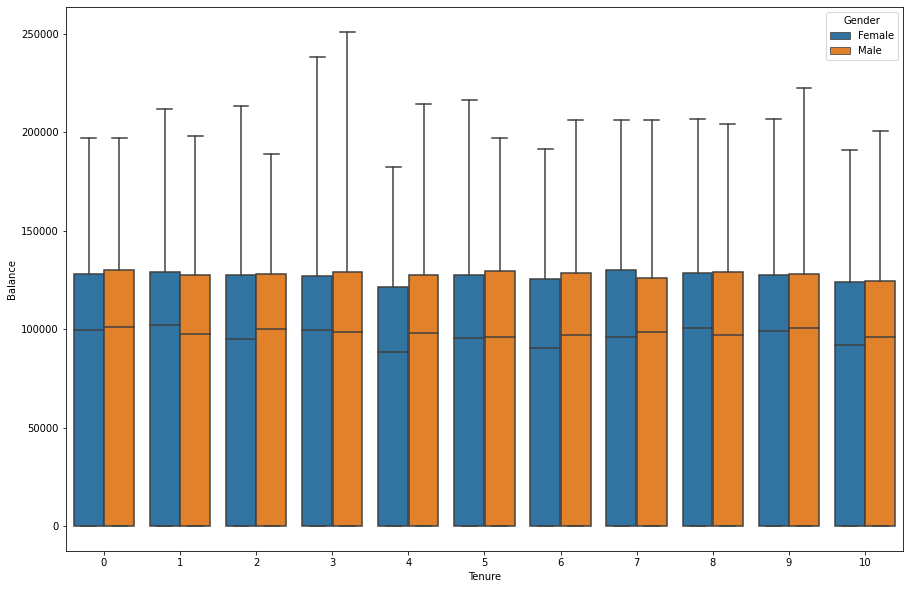

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x='Tenure',y='Balance',hue='Gender')

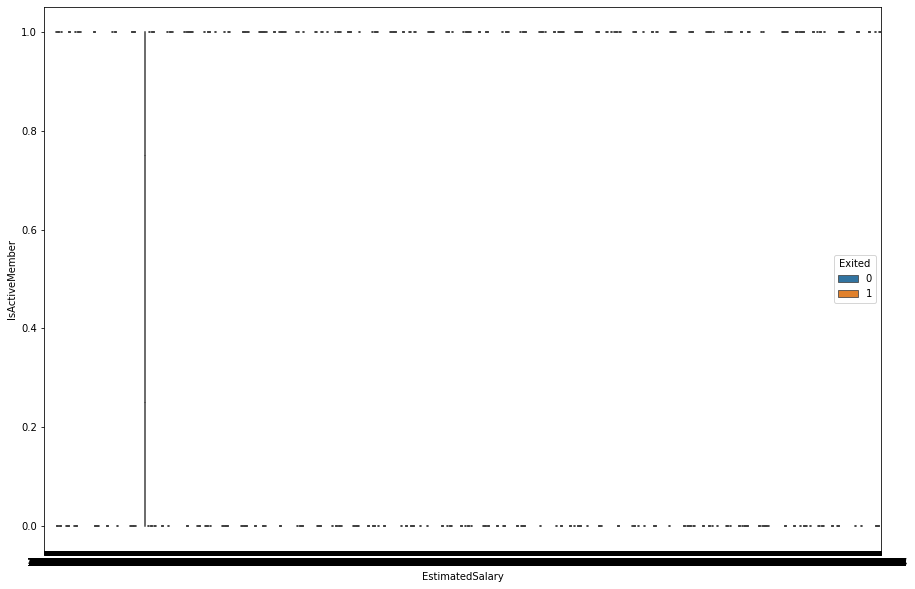

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, y='IsActiveMember', x='EstimatedSalary',hue='Exited')

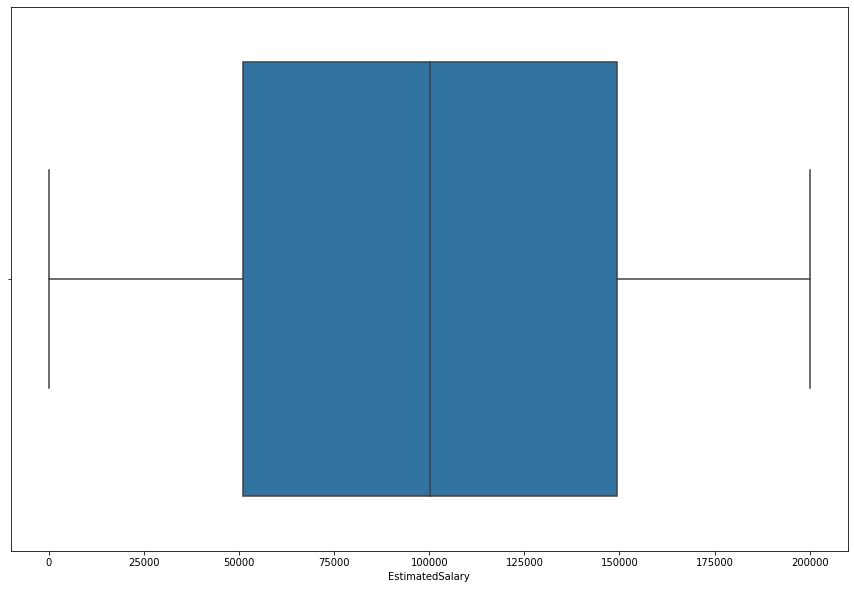

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x='EstimatedSalary')

* Scatter plot of features

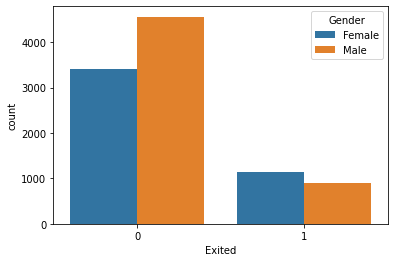

In [ ]:
sns.countplot(x='Exited', data=df,hue='Gender')

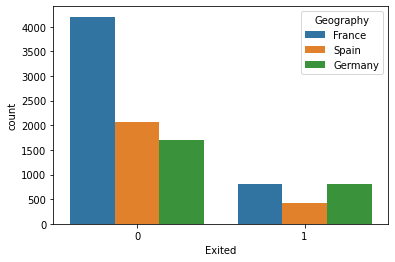

In [ ]:
sns.countplot(x='Exited', data=df,hue='Geography')

* So customers of Germany has churned the most and France has more number of not churned member.

> * 2.5 Bi-variate Analysis

In [ ]:
import seaborn as sns


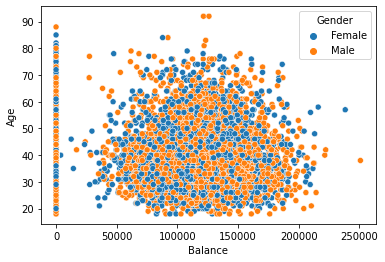

In [ ]:
sns.scatterplot(data=df, x='Balance',y='Age',hue='Gender')


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

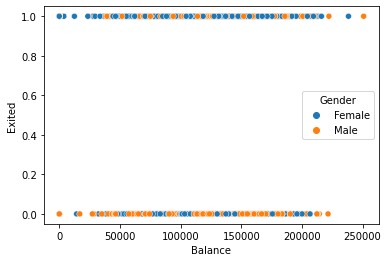

In [ ]:
sns.scatterplot(data=df, x='Balance',y='Exited',hue='Gender')

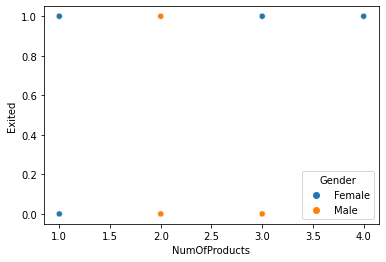

In [ ]:
sns.scatterplot(data=df, x='NumOfProducts',y='Exited',hue='Gender')

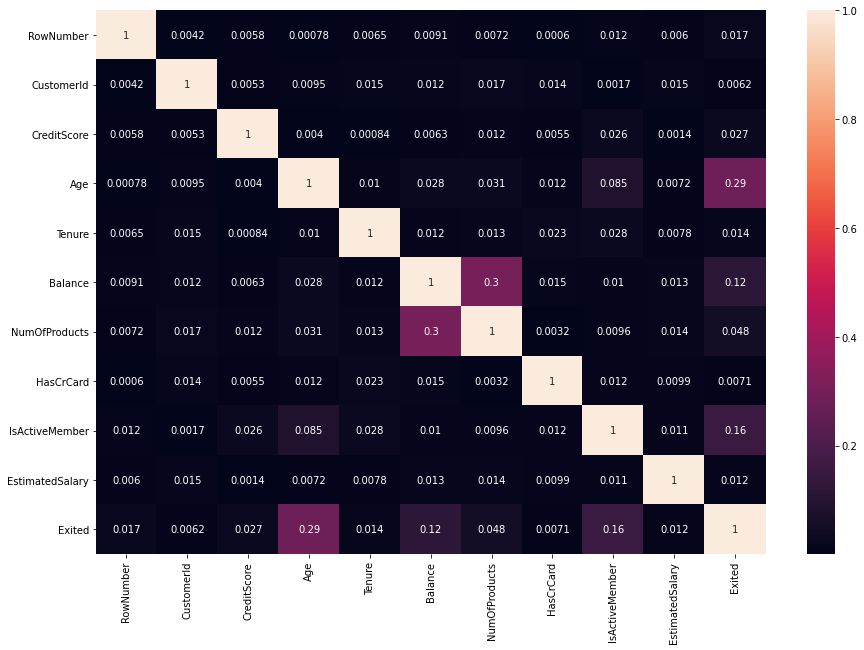

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr().abs(),annot=True)

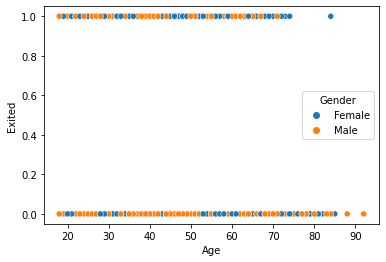

In [ ]:
sns.scatterplot(data=df, x='Age',y='Exited',hue='Gender')

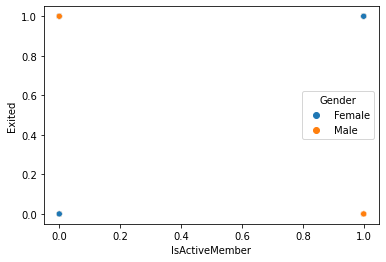

In [ ]:
sns.scatterplot(data=df, x='IsActiveMember',y='Exited',hue='Gender')

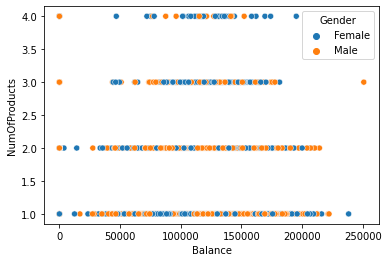

In [ ]:
sns.scatterplot(data=df, x='Balance',y='NumOfProducts',hue='Gender')

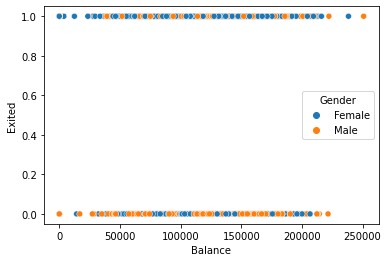

In [ ]:
sns.scatterplot(data=df, x='Balance',y='Exited',hue='Gender')


  * 2.6 Pair plot

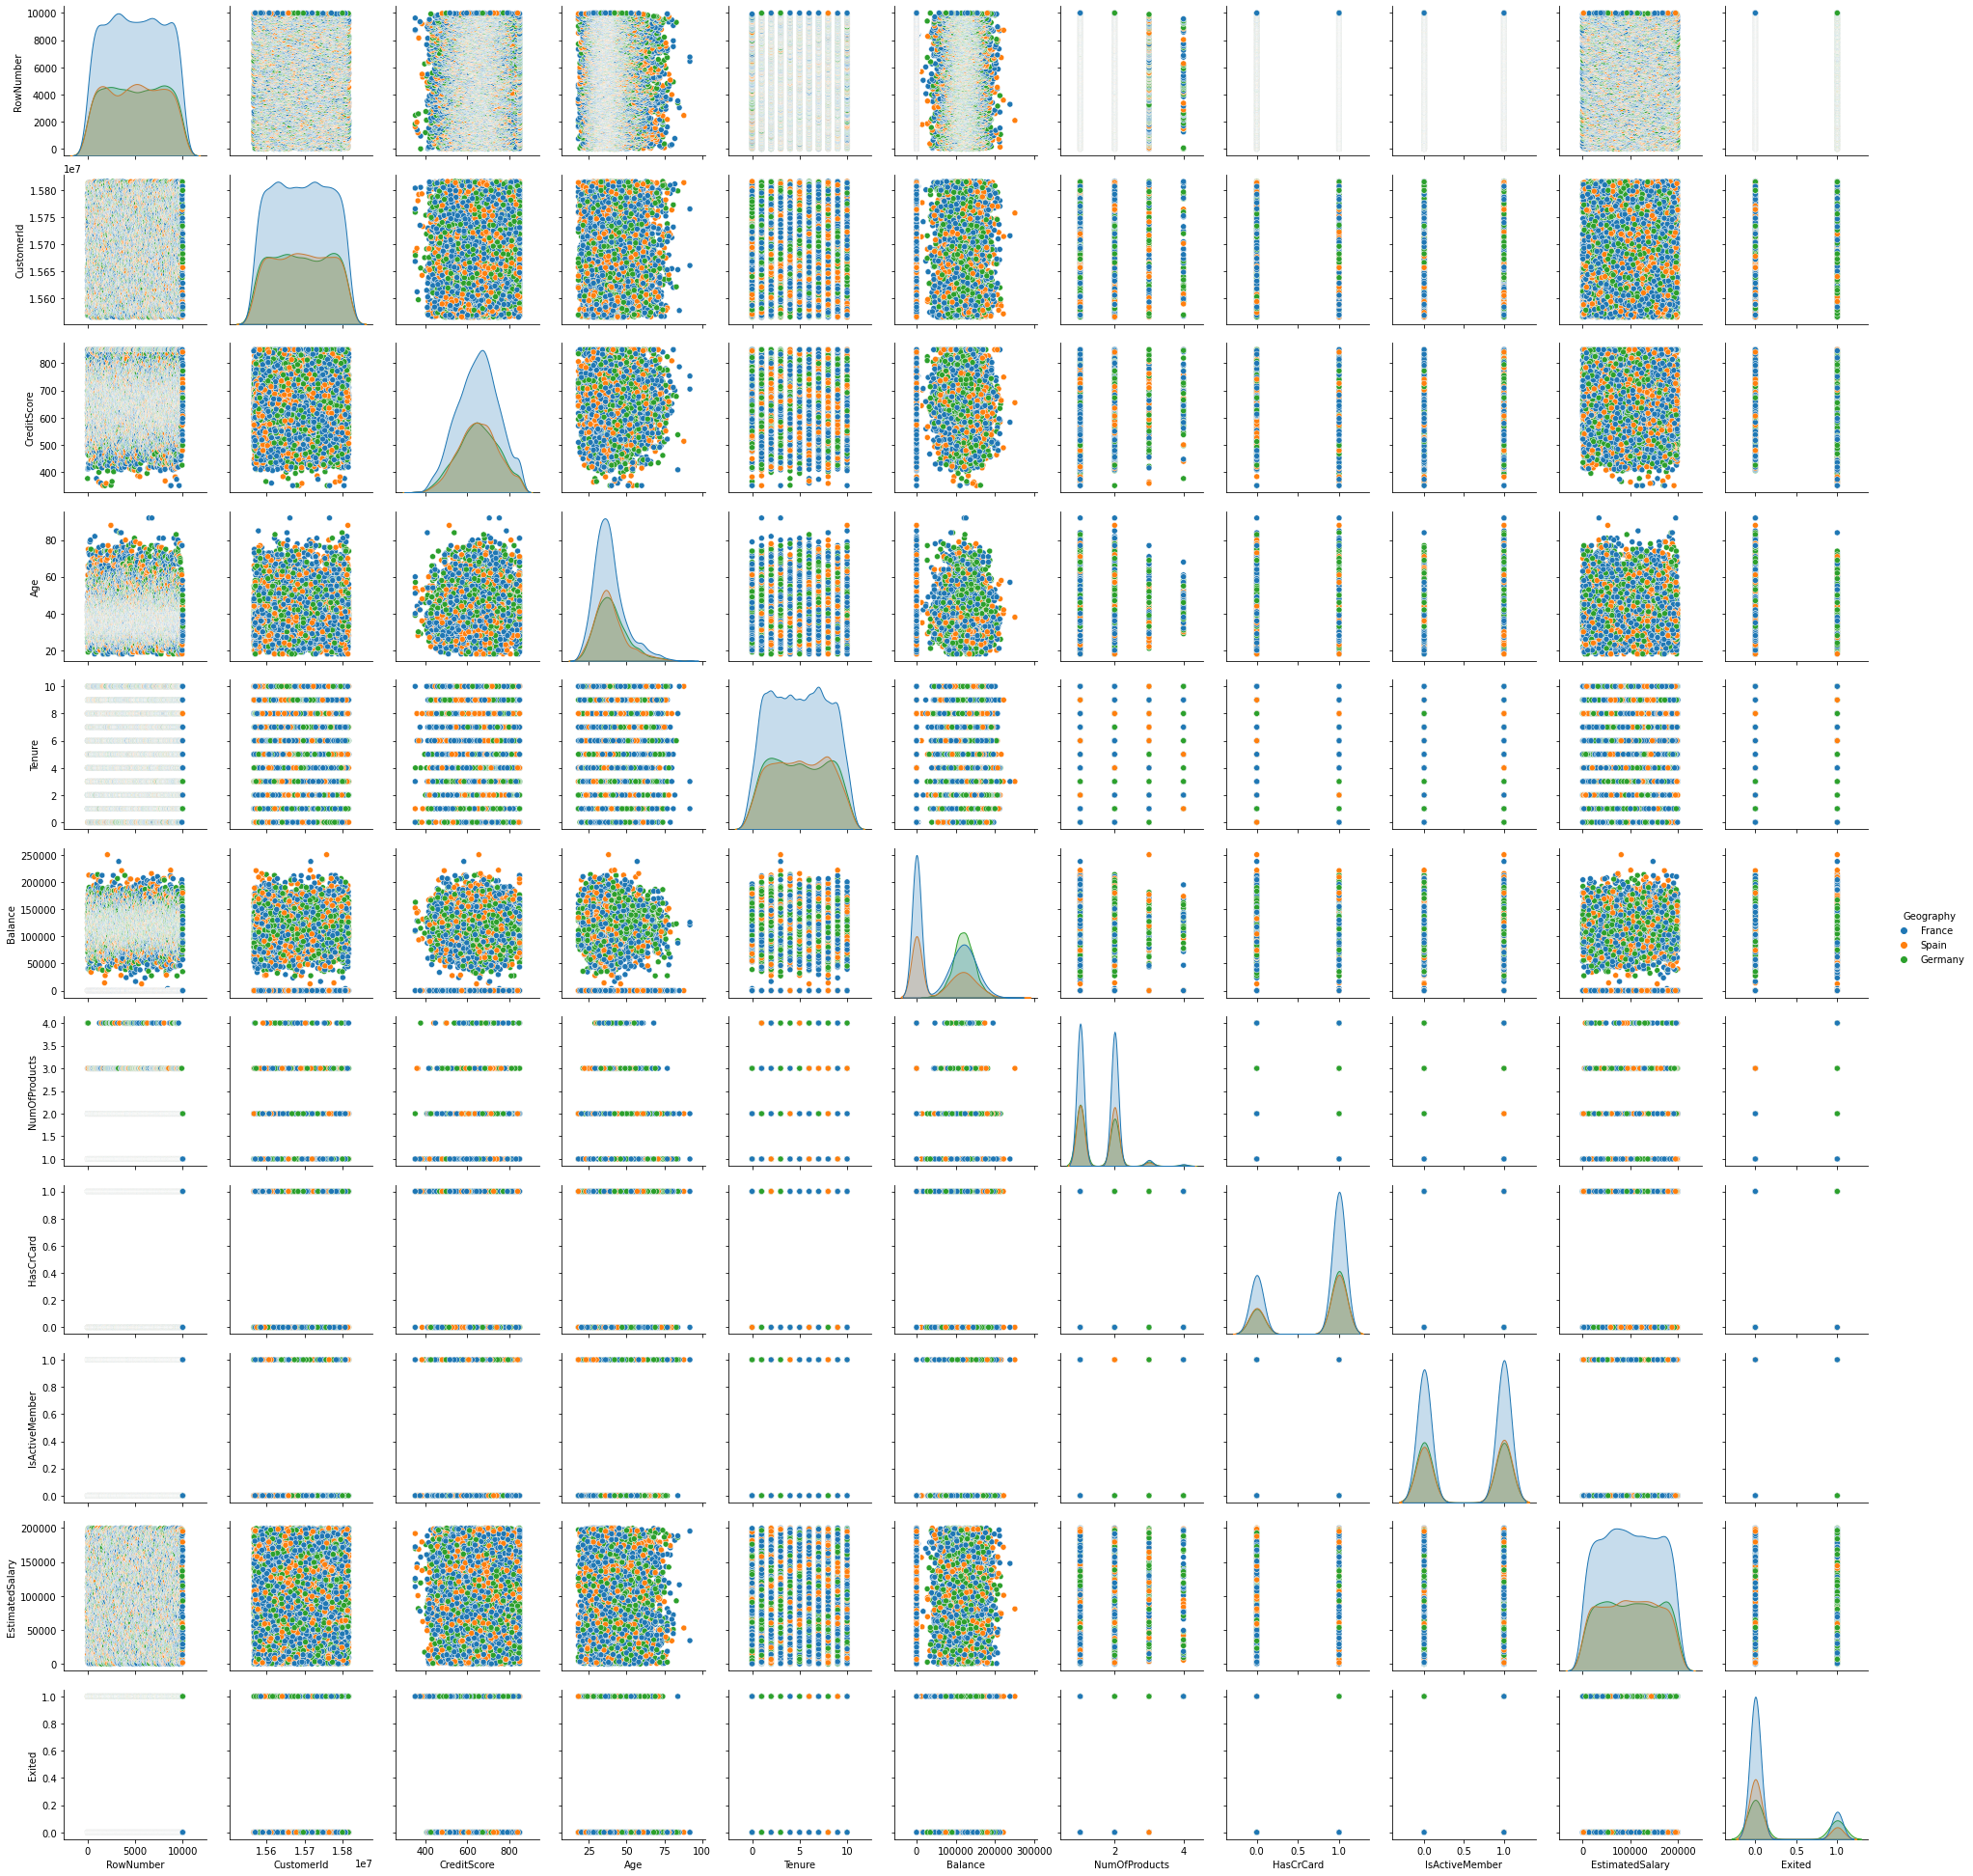

In [ ]:
sns.pairplot(data=df,hue='Geography')

  * 2.7 Multivariate Analysis

In [ ]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [ ]:

import plotly.express as px

fig = px.scatter_3d(df, x='IsActiveMember', y='Age', z='Exited',#hue='Gender')
              color='Geography')
fig.show()

> # CHAPTER 3 
  * # Distrubution of Data

In [ ]:
df1=df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Geography','Gender'],axis=0)
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
list1=list(df1.columns)
list1

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

# 3.1 computing confidance interval and Histogram

CreditScore


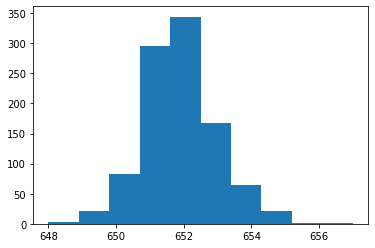

95.0 confidence interval 650.0 and 654.0
Age


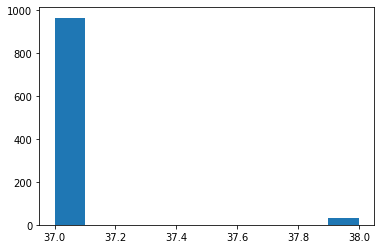

95.0 confidence interval 37.0 and 38.0
Tenure


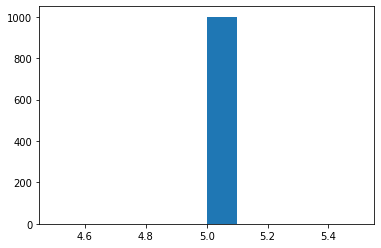

95.0 confidence interval 5.0 and 5.0
Balance


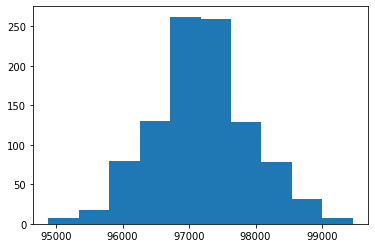

95.0 confidence interval 95806.7 and 98620.0
NumOfProducts


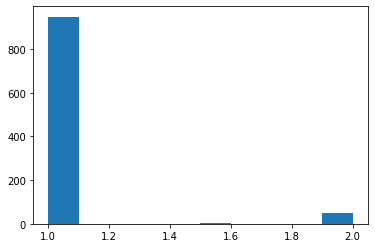

95.0 confidence interval 1.0 and 2.0
HasCrCard


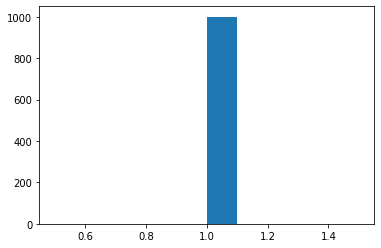

95.0 confidence interval 1.0 and 1.0
IsActiveMember


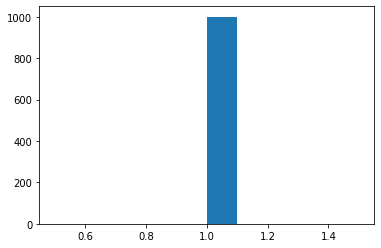

95.0 confidence interval 1.0 and 1.0
EstimatedSalary


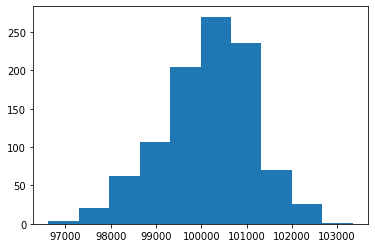

95.0 confidence interval 97982.9 and 102004.9
Exited


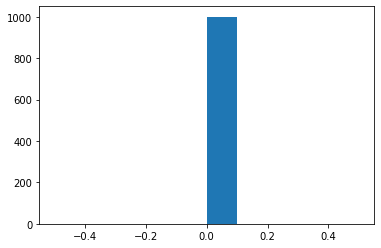

95.0 confidence interval 0.0 and 0.0


In [ ]:
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import seaborn as sns

# load dataset
for i in list1:
  x=df1[i]
  print(i)
  #sns.kdeplot(x,shade=True,bw_adjust=100)
  # configure bootstrap
  n_iterations = 1000
  n_size = int(len(x))

  # run bootstrap
  medians = list()
  for i in range(n_iterations):
    # prepare train and test sets
    s = resample(x, n_samples=n_size);
    m = numpy.median(s);
    #print(m)
    medians.append(m)

  # plot scores
  pyplot.hist(medians)
  pyplot.show()

  # confidence intervals
  alpha = 0.95
  p = ((1.0-alpha)/2.0) * 100
  lower =  numpy.percentile(medians, p)

  p = (alpha+((1.0-alpha)/2.0)) * 100
  upper =  numpy.percentile(medians, p)
  print('%.1f confidence interval %.1f and %.1f' % (alpha*100, lower, upper))
  #print(i)

* # 3.2 Stastistics Test (K-S Test)

In [1]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt



In [ ]:
for i in list1:
  x=df1[i]
  print(stats.kstest(x, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.8324498680518208, pvalue=0.0)
KstestResult(statistic=0.6383, pvalue=0.0)
KstestResult(statistic=0.8413447460685429, pvalue=0.0)
KstestResult(statistic=0.5468447460685429, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=0.0)


>* # 3.3 Plotting KDE and Q-Q plot sequentially

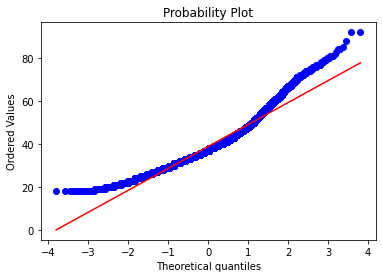

In [ ]:
import pylab
stats.probplot(df1['Age'], dist="norm", plot=pylab)
pylab.show()

((array([-3.81060943, -3.58545756, -3.46184782, ...,  3.46184782,
          3.58545756,  3.81060943]), array([18, 18, 18, ..., 88, 92, 92])),
 (10.19376611865213, 38.9218, 0.9716644603967083))

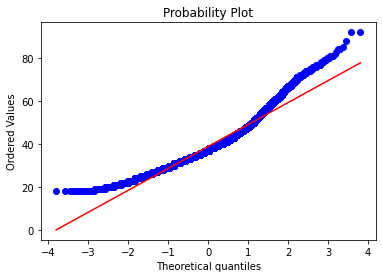

In [ ]:
stats.probplot(df1['Age'], dist="norm", plot=pylab)

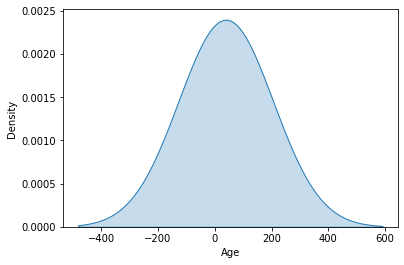

In [ ]:
sns.kdeplot(df1['Age'],shade=True,bw_adjust=100)
 

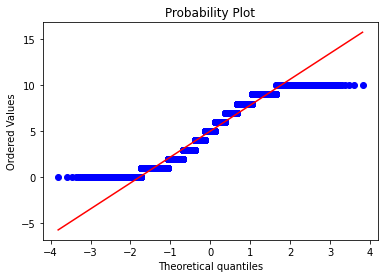

In [ ]:
import pylab
stats.probplot(df1['Tenure'], dist="norm", plot=pylab)
pylab.show()

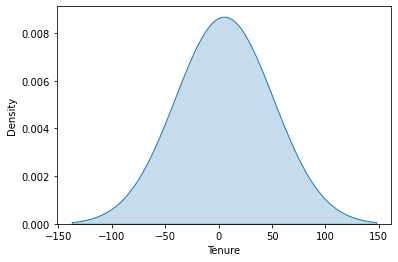

In [ ]:
sns.kdeplot(df1['Tenure'],shade=True,bw_adjust=100)

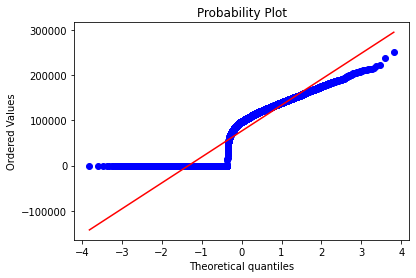

In [ ]:
import pylab
stats.probplot(df1['Balance'], dist="norm", plot=pylab)
pylab.show()

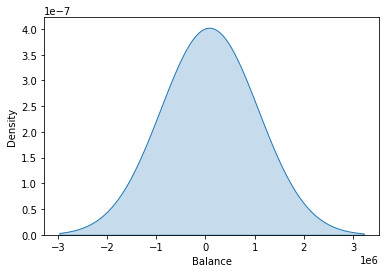

In [ ]:
sns.kdeplot(df1['Balance'],shade=True,bw_adjust=100)

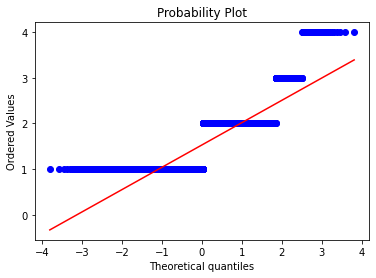

In [ ]:
import pylab
stats.probplot(df1['NumOfProducts'], dist="norm", plot=pylab)
pylab.show()

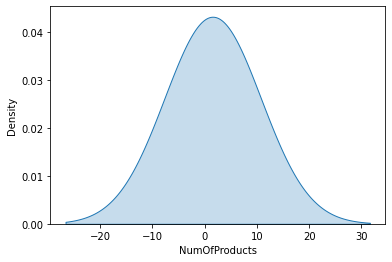

In [ ]:
sns.kdeplot(df1['NumOfProducts'],shade=True,bw_adjust=100)

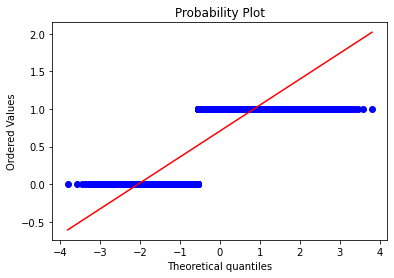

In [ ]:
import pylab
stats.probplot(df1['HasCrCard'], dist="norm", plot=pylab)
pylab.show()


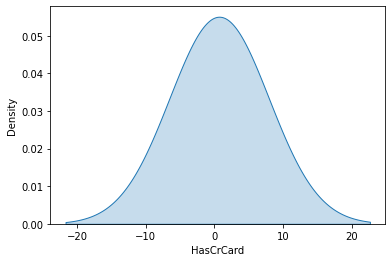

In [ ]:
sns.kdeplot(df1['HasCrCard'],shade=True,bw_adjust=100)

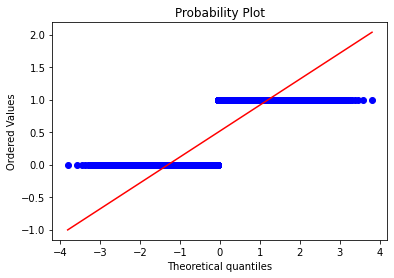

In [ ]:
import pylab
stats.probplot(df1['IsActiveMember'], dist="norm", plot=pylab)
pylab.show()


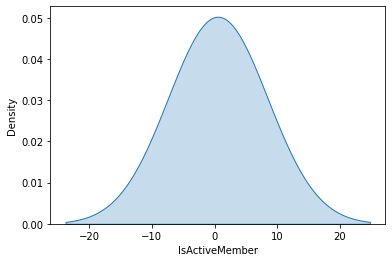

In [ ]:
sns.kdeplot(df1['IsActiveMember'],shade=True,bw_adjust=100)


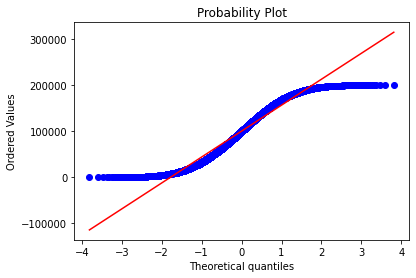

In [ ]:
import pylab
stats.probplot(df1['EstimatedSalary'], dist="norm", plot=pylab)
pylab.show()


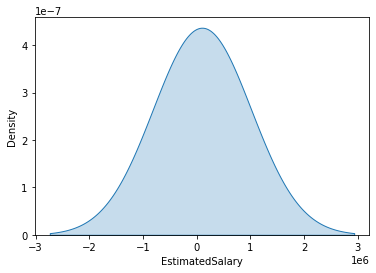

In [ ]:
sns.kdeplot(df1['EstimatedSalary'],shade=True,bw_adjust=100)


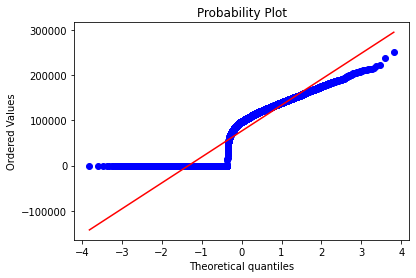

In [ ]:
import pylab
stats.probplot(df1['Balance'], dist="norm", plot=pylab)
pylab.show()


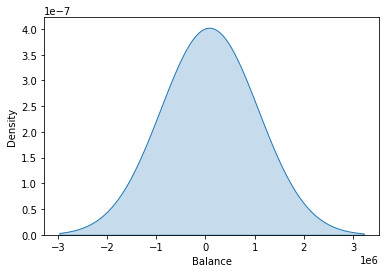

In [ ]:
sns.kdeplot(df1['Balance'],shade=True,bw_adjust=100)

In [ ]:
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import pandas.util.testing as tm


def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

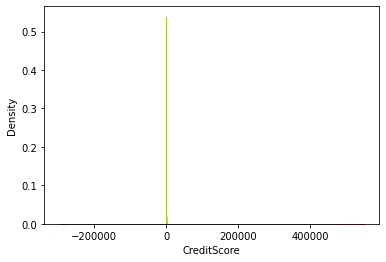

In [ ]:
import seaborn as sns
for i in list1:
  x=df1[i]
  sns.kdeplot(x,shade=True,bw_adjust=10)

> # CHAPTER 4
  # DATA PRE-PROCESSING AND STANDARDIZATION

In the previous chapter,we have that all the features are having bell shape pdf which resembles distribution close of normal ,but in Q-Q plot it can be widely seen that feature "Tenure","Balance","Number of Product" are having widely dispersed outlier.So in order to reduce outlier.So in order to reduce outlier impact and to have more reliable model we will use data standerization stretegy ,so that we will have feature with zero mean and unity standard deviation that will be  robust to outlier.We will not use Normalization as it is not robust to outliers.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


So the data set is balnced and there is no missing valuepresent in it.If there will be any missing values then we will impute that by median of that so to less impact on outliers.

In [10]:
df2=df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],axis=0)
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Here we have dropped "RowNumber","CustomerId", "Surname" column as this column is less informative in concern with prediction modelling.


In [11]:
df3=df2.loc[:,['Geography','Gender']]
df3

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [12]:
df3.shape

(10000, 2)

In [13]:
pd.get_dummies(df3).shape

(10000, 5)

In [14]:
df6=pd.get_dummies(df3)
df6

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,1,0
1,0,0,1,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,0,0,1,1,0
...,...,...,...,...,...
9995,1,0,0,0,1
9996,1,0,0,0,1
9997,1,0,0,1,0
9998,0,1,0,0,1


In [15]:
df7=df6.drop('Gender_Male',axis=1)
df7

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female
0,1,0,0,1
1,0,0,1,1
2,1,0,0,1
3,1,0,0,1
4,0,0,1,1
...,...,...,...,...
9995,1,0,0,0
9996,1,0,0,0
9997,1,0,0,1
9998,0,1,0,0


In [ ]:
#result = pd.concat([df1, df4], ignore_index=True, sort=False)

In [16]:
df8=df.drop(columns=['RowNumber', 'CustomerId', 'Surname','Gender','Geography'],axis=0)
df8

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [17]:
result = pd.concat([df7, df8], ignore_index=False, sort=False,axis=1)
result1=result.iloc[:,:-1]
result1

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,0,0,1,619,42,2,0.00,1,1,1,101348.88
1,0,0,1,1,608,41,1,83807.86,1,0,1,112542.58
2,1,0,0,1,502,42,8,159660.80,3,1,0,113931.57
3,1,0,0,1,699,39,1,0.00,2,0,0,93826.63
4,0,0,1,1,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,0,771,39,5,0.00,2,1,0,96270.64
9996,1,0,0,0,516,35,10,57369.61,1,1,1,101699.77
9997,1,0,0,1,709,36,7,0.00,1,0,1,42085.58
9998,0,1,0,0,772,42,3,75075.31,2,1,0,92888.52


# DATA STANDARDIZATION

In [18]:
from sklearn import preprocessing
# Get column names first
names = result1.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(result1)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.997204,-0.578736,-0.573809,1.095988,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-1.002804,-0.578736,1.742740,1.095988,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,0.997204,-0.578736,-0.573809,1.095988,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.997204,-0.578736,-0.573809,1.095988,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,-1.002804,-0.578736,1.742740,1.095988,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.997204,-0.578736,-0.573809,-0.912419,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,0.997204,-0.578736,-0.573809,-0.912419,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.997204,-0.578736,-0.573809,1.095988,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,-1.002804,1.727904,-0.573809,-0.912419,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [19]:
# X = result.iloc[:,:-1]
# y = result.iloc[:,-1]
X = scaled_df
y = result.iloc[:,-1]

In [ ]:
X

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.997204,-0.578736,-0.573809,1.095988,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-1.002804,-0.578736,1.742740,1.095988,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,0.997204,-0.578736,-0.573809,1.095988,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.997204,-0.578736,-0.573809,1.095988,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,-1.002804,-0.578736,1.742740,1.095988,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.997204,-0.578736,-0.573809,-0.912419,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,0.997204,-0.578736,-0.573809,-0.912419,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.997204,-0.578736,-0.573809,1.095988,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,-1.002804,1.727904,-0.573809,-0.912419,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=111,stratify=y)

# CHAPTER 5
# MODELLING DATA WITH ML ALGORITHM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import datasets, linear_model, metrics
from sklearn import svm
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=111,stratify=y)
#model.fit(X_train,y_train)

In [ ]:
algorithm=[LogisticRegression(),GaussianNB(),RandomForestClassifier()]
models=[]
for i in algorithm:
  model=i
  model.fit(X_train,y_train)
  b=model.predict(X_test)
  from sklearn.metrics import r2_score
  from sklearn.metrics import classification_report
  classification_report(y_test,b)
  
  print(i,classification_report(y_test, b))
  import matplotlib.pyplot as plt
  
  
  a=r2_score(y_test,b)
  models.append([i,a])
df10=pd.DataFrame(models, columns = ['model', 'Accuracy']) 
df10




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)               precision    recall  f1-score   support

           0       0.83      0.96      0.89      2389
           1       0.57      0.22      0.31       611

    accuracy                           0.81      3000
   macro avg       0.70      0.59      0.60      3000
weighted avg       0.77      0.81      0.77      3000

GaussianNB(priors=None, var_smoothing=1e-09)               precision    recall  f1-score   support

           0       0.85      0.92      0.88      2389
           1       0.54      0.36      0.43       611

    accuracy                           0.81      3000
   macro avg       0.69      0.64      0.66      3000
weighted avg       0.79      0

,model,Accuracy
0,"LogisticRegression(C=1.0, class_weight=None, d...",-0.189988
1,"GaussianNB(priors=None, var_smoothing=1e-09)",-0.196153
2,"(DecisionTreeClassifier(ccp_alpha=0.0, class_w...",0.122410


# CHAPTER 6 
# MODEL PERFORMANCE AND EVALUATION



Plotting of AUC and ROC curve for different algorithm .
We are going to plot AUC and ROC curve for different algorithm ,it is a plot between False Positive Rate vs True Positive Rate. The algorithm which has larger AUC value will have higher performance then the algorithm with lower AUC value.

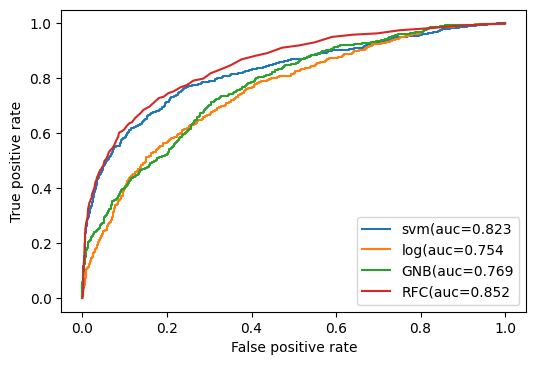

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import datasets, linear_model, metrics
from sklearn import svm
from sklearn.svm import SVC
svc = SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc


sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)
# SVM CLASSIFIER
model_svc=svc()
model_svc.fit(X_train,y_train)
y_pred_svm = model_svc.decision_function(X_test)
#GaussianNB
model_GNB=GaussianNB()
model_GNB.fit(X_train,y_train)
y_pred_GNB = model_GNB.predict_proba(X_test)
#RandomForestClassifier
model_RFC=RandomForestClassifier()
model_RFC.fit(X_train,y_train)
y_pred_RFC = model_RFC.predict_proba(X_test)
#logistic classifier
model_logistic=LogisticRegression()
model_logistic.fit(X_train,y_train)
y_pred_logistic = model_logistic.decision_function(X_test)
#plot ROC and compare AUC
from sklearn.metrics import roc_auc_score,auc
log_fpr,log_tpr,threshold=roc_curve(y_test,y_pred_logistic)
GNB_fpr,GNB_tpr,threshold=roc_curve(y_test,y_pred_GNB[:,1])
RFC_fpr,RFC_tpr,threshold=roc_curve(y_test,y_pred_RFC[:,1])
svm_fpr,svm_tpr,threshold=roc_curve(y_test,y_pred_svm)
 #AUC
auc_svm=auc(svm_fpr,svm_tpr)
auc_log=auc(log_fpr,log_tpr)
auc_GNB=auc(GNB_fpr,GNB_tpr)
auc_RFC=auc(RFC_fpr,RFC_tpr)
#
plt.figure(dpi=100)
plt.plot(svm_fpr,svm_tpr,linestyle='-',label='svm(auc=%0.3f'%auc_svm)
plt.plot(log_fpr,log_tpr,linestyle='-',label='log(auc=%0.3f'%auc_log)
plt.plot(GNB_fpr,GNB_tpr,linestyle='-',label='GNB(auc=%0.3f'%auc_GNB)
plt.plot(RFC_fpr,RFC_tpr,linestyle='-',label='RFC(auc=%0.3f'%auc_RFC)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show()


It can be clearly seen that area under RFC > SVM >GNB >LOG.
So it can be concluded that for this data RFC having lower miss classified point then any other algorithm.

In [ ]:
y_train=pd.get_dummies(y_train)
y_train

,0,1
58,0,1
2281,1,0
5887,0,1
759,1,0
8397,0,1
...,...,...
5999,1,0
4540,1,0
4413,1,0
5085,0,1


# CHAPTER 7
# PARAMETER TUNNING AND PERFORMANCE EVALUATION

* Here we are taking logistic regression for parameter tunning because it has less accuracy as compared to other algorithm .So we try to improve the accuracy by parameter tunning and thereby improving performance of model.

# 7.1 Logistic regression hyper-parameter tunning

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=111,stratify=y)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import warnings
estimators = []
estimators.append(('SC',StandardScaler()))
estimators.append(('LR',LogisticRegression()))
estimators
from sklearn.pipeline import Pipeline

model = Pipeline(estimators)
model.fit(X_train,y_train)
model.score(X_test,y_test)
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=111)
results = cross_val_score(model, X, y, cv=skf)
print(results.mean())
from sklearn.model_selection import GridSearchCV
model.get_params()
pg = {'LR__C': [0.001,0.01,0.1,1.0],
      'LR__penalty': ['l1', 'l2', 'elasticnet', 'none']}

gs_model = GridSearchCV(model, param_grid=pg, cv=10, verbose=2)
gs_model.fit(X_train,y_train)
gs_model.best_params_
gs_model.best_score_

0.8103
Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] LR__C=0.001, LR__penalty=l1 .....................................
[CV] ...................... LR__C=0.001, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.001, LR__penalty=l1 .....................................
[CV] ...................... LR__C=0.001, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.001, LR__penalty=l1 .....................................
[CV] ...................... LR__C=0.001, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.001, LR__penalty=l1 .....................................
[CV] ...................... LR__C=0.001, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.001, LR__penalty=l1 .....................................
[CV] ...................... LR__C=0.001, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.001, LR__penalty=l1 .....................................
[CV] ...................... LR__C=0.001, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.001, LR__penalty=l1 .....................................
[CV] ..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Detail

[CV] ...................... LR__C=0.001, LR__penalty=l2, total=   0.0s
[CV] LR__C=0.001, LR__penalty=l2 .....................................
[CV] ...................... LR__C=0.001, LR__penalty=l2, total=   0.0s
[CV] LR__C=0.001, LR__penalty=l2 .....................................
[CV] ...................... LR__C=0.001, LR__penalty=l2, total=   0.0s
[CV] LR__C=0.001, LR__penalty=l2 .....................................
[CV] ...................... LR__C=0.001, LR__penalty=l2, total=   0.0s
[CV] LR__C=0.001, LR__penalty=l2 .....................................
[CV] ...................... LR__C=0.001, LR__penalty=l2, total=   0.0s
[CV] LR__C=0.001, LR__penalty=elasticnet .............................
[CV] .............. LR__C=0.001, LR__penalty=elasticnet, total=   0.0s
[CV] LR__C=0.001, LR__penalty=elasticnet .............................
[CV] .............. LR__C=0.001, LR__penalty=elasticnet, total=   0.0s
[CV] LR__C=0.001, LR__penalty=elasticnet .............................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-p

[CV] .................... LR__C=0.001, LR__penalty=none, total=   0.0s
[CV] LR__C=0.001, LR__penalty=none ...................................
[CV] .................... LR__C=0.001, LR__penalty=none, total=   0.0s
[CV] LR__C=0.001, LR__penalty=none ...................................
[CV] .................... LR__C=0.001, LR__penalty=none, total=   0.0s
[CV] LR__C=0.001, LR__penalty=none ...................................
[CV] .................... LR__C=0.001, LR__penalty=none, total=   0.0s
[CV] LR__C=0.001, LR__penalty=none ...................................
[CV] .................... LR__C=0.001, LR__penalty=none, total=   0.0s
[CV] LR__C=0.001, LR__penalty=none ...................................
[CV] .................... LR__C=0.001, LR__penalty=none, total=   0.0s
[CV] LR__C=0.001, LR__penalty=none ...................................
[CV] .................... LR__C=0.001, LR__penalty=none, total=   0.0s
[CV] LR__C=0.001, LR__penalty=none ...................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV] .................... LR__C=0.001, LR__penalty=none, total=   0.0s
[CV] LR__C=0.01, LR__penalty=l1 ......................................
[CV] ....................... LR__C=0.01, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.01, LR__penalty=l1 ......................................
[CV] ....................... LR__C=0.01, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.01, LR__penalty=l1 ......................................
[CV] ....................... LR__C=0.01, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.01, LR__penalty=l1 ......................................
[CV] ....................... LR__C=0.01, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.01, LR__penalty=l1 ......................................
[CV] ....................... LR__C=0.01, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.01, LR__penalty=l1 ......................................
[CV] ....................... LR__C=0.01, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.01, LR__penalty=l1 ......................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-p

[CV] ..................... LR__C=0.01, LR__penalty=none, total=   0.0s
[CV] LR__C=0.01, LR__penalty=none ....................................
[CV] ..................... LR__C=0.01, LR__penalty=none, total=   0.0s
[CV] LR__C=0.01, LR__penalty=none ....................................
[CV] ..................... LR__C=0.01, LR__penalty=none, total=   0.0s
[CV] LR__C=0.01, LR__penalty=none ....................................
[CV] ..................... LR__C=0.01, LR__penalty=none, total=   0.0s
[CV] LR__C=0.01, LR__penalty=none ....................................
[CV] ..................... LR__C=0.01, LR__penalty=none, total=   0.0s
[CV] LR__C=0.01, LR__penalty=none ....................................
[CV] ..................... LR__C=0.01, LR__penalty=none, total=   0.0s
[CV] LR__C=0.01, LR__penalty=none ....................................
[CV] ..................... LR__C=0.01, LR__penalty=none, total=   0.0s
[CV] LR__C=0.01, LR__penalty=none ....................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV] ........................ LR__C=0.1, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.1, LR__penalty=l1 .......................................
[CV] ........................ LR__C=0.1, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.1, LR__penalty=l1 .......................................
[CV] ........................ LR__C=0.1, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.1, LR__penalty=l1 .......................................
[CV] ........................ LR__C=0.1, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.1, LR__penalty=l1 .......................................
[CV] ........................ LR__C=0.1, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.1, LR__penalty=l1 .......................................
[CV] ........................ LR__C=0.1, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.1, LR__penalty=l1 .......................................
[CV] ........................ LR__C=0.1, LR__penalty=l1, total=   0.0s
[CV] LR__C=0.1, LR__penalty=l1 .......................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-p

[CV] ...................... LR__C=0.1, LR__penalty=none, total=   0.0s
[CV] LR__C=0.1, LR__penalty=none .....................................
[CV] ...................... LR__C=0.1, LR__penalty=none, total=   0.0s
[CV] LR__C=0.1, LR__penalty=none .....................................
[CV] ...................... LR__C=0.1, LR__penalty=none, total=   0.0s
[CV] LR__C=0.1, LR__penalty=none .....................................
[CV] ...................... LR__C=0.1, LR__penalty=none, total=   0.0s
[CV] LR__C=0.1, LR__penalty=none .....................................
[CV] ...................... LR__C=0.1, LR__penalty=none, total=   0.0s
[CV] LR__C=0.1, LR__penalty=none .....................................
[CV] ...................... LR__C=0.1, LR__penalty=none, total=   0.0s
[CV] LR__C=0.1, LR__penalty=none .....................................
[CV] ...................... LR__C=0.1, LR__penalty=none, total=   0.0s
[CV] LR__C=0.1, LR__penalty=none .....................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

[CV] ........................ LR__C=1.0, LR__penalty=l1, total=   0.0s
[CV] LR__C=1.0, LR__penalty=l1 .......................................
[CV] ........................ LR__C=1.0, LR__penalty=l1, total=   0.0s
[CV] LR__C=1.0, LR__penalty=l1 .......................................
[CV] ........................ LR__C=1.0, LR__penalty=l1, total=   0.0s
[CV] LR__C=1.0, LR__penalty=l1 .......................................
[CV] ........................ LR__C=1.0, LR__penalty=l1, total=   0.0s
[CV] LR__C=1.0, LR__penalty=l1 .......................................
[CV] ........................ LR__C=1.0, LR__penalty=l1, total=   0.0s
[CV] LR__C=1.0, LR__penalty=l1 .......................................
[CV] ........................ LR__C=1.0, LR__penalty=l1, total=   0.0s
[CV] LR__C=1.0, LR__penalty=l1 .......................................
[CV] ........................ LR__C=1.0, LR__penalty=l1, total=   0.0s
[CV] LR__C=1.0, LR__penalty=l1 .......................................
[CV] .

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-p

[CV] ...................... LR__C=1.0, LR__penalty=none, total=   0.0s
[CV] LR__C=1.0, LR__penalty=none .....................................
[CV] ...................... LR__C=1.0, LR__penalty=none, total=   0.0s
[CV] LR__C=1.0, LR__penalty=none .....................................
[CV] ...................... LR__C=1.0, LR__penalty=none, total=   0.0s
[CV] LR__C=1.0, LR__penalty=none .....................................
[CV] ...................... LR__C=1.0, LR__penalty=none, total=   0.0s
[CV] LR__C=1.0, LR__penalty=none .....................................
[CV] ...................... LR__C=1.0, LR__penalty=none, total=   0.0s
[CV] LR__C=1.0, LR__penalty=none .....................................
[CV] ...................... LR__C=1.0, LR__penalty=none, total=   0.0s
[CV] LR__C=1.0, LR__penalty=none .....................................
[CV] ...................... LR__C=1.0, LR__penalty=none, total=   0.0s
[CV] LR__C=1.0, LR__penalty=none .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    2.5s finished


0.8132857142857143

# 7.2 PCA and RandomForest Implementation

In [33]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
steps = []

steps.append(('PCA',PCA(n_components=3)))
steps.append(('RF',RandomForestClassifier()))
model = Pipeline(steps)
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.818

# 7.3 RandomForest Hyper-parameter tunning

In [42]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from sklearn.model_selection import RandomizedSearchCV
skf = StratifiedKFold(n_splits=10, shuffle=True,random_state=111)
results = cross_val_score(model, X, y, cv=skf)
print(results.mean())
from sklearn.model_selection import GridSearchCV
model.get_params()
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3,13, num =10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)
rf_random.best_params_

0.8219999999999998
{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 13, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 38.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

# CHAPTER 8 
# NEURAL NETWORK IMPLEMENTATION

In [132]:
import keras #pip install keras,tensorflow
from keras.models import Sequential
from keras.layers import Dense

# 8.1 Building models of neural network

In [133]:
model = Sequential()
#input layer

model.add(Dense(units=12, input_dim=12, activation='relu'))
#activation functions could be: sigmoid, relu, leaky relu, tanh
# 1st hidden layer

model.add(Dense(units=8, activation='relu'))

In [134]:
# 2nd hidden layer

model.add(Dense(units=4, activation='relu'))
# Output Layer

model.add(Dense(units=2, activation='softmax'))

In [135]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 10        
Total params: 306
Trainable params: 306
Non-trainable params: 0
_________________________________________________________________


# 8.2 Visualizing the Model

In [136]:
#Visualizing the model
%pip install ann_visualizer
from ann_visualizer.visualize import ann_viz
from graphviz import Source

In [137]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [138]:
model.fit(X_train, y_train ,epochs=25, batch_size= 50)

Epoch 1/25
140/140 [==============================] - 0s 1ms/step - loss: 0.6361 - accuracy: 0.6696
Epoch 2/25
140/140 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.8051
Epoch 3/25
140/140 [==============================] - 0s 1ms/step - loss: 0.4286 - accuracy: 0.8114
Epoch 4/25
140/140 [==============================] - 0s 1ms/step - loss: 0.4065 - accuracy: 0.8219
Epoch 5/25
140/140 [==============================] - 0s 1ms/step - loss: 0.3901 - accuracy: 0.8317
Epoch 6/25
140/140 [==============================] - 0s 1ms/step - loss: 0.3776 - accuracy: 0.8393
Epoch 7/25
140/140 [==============================] - 0s 1ms/step - loss: 0.3684 - accuracy: 0.8447
Epoch 8/25
140/140 [==============================] - 0s 1ms/step - loss: 0.3611 - accuracy: 0.8471
Epoch 9/25
140/140 [==============================] - 0s 1ms/step - loss: 0.3564 - accuracy: 0.8493
Epoch 10/25
140/140 [==============================] - 0s 1ms/step - loss: 0.3523 - accuracy: 0.8504

In [103]:

#Prediction time

dm_pred = model.predict(X_test)

In [104]:
dm_pred.shape

(3000, 2)

In [105]:
dm_pred[0]

array([0.99096984, 0.00903017], dtype=float32)

In [106]:
np.max(dm_pred[0])

0.99096984

In [109]:
ann_viz(model,title='Neural Network Model of churn prediction')

In [111]:
graph_source=Source.from_file('network.gv')

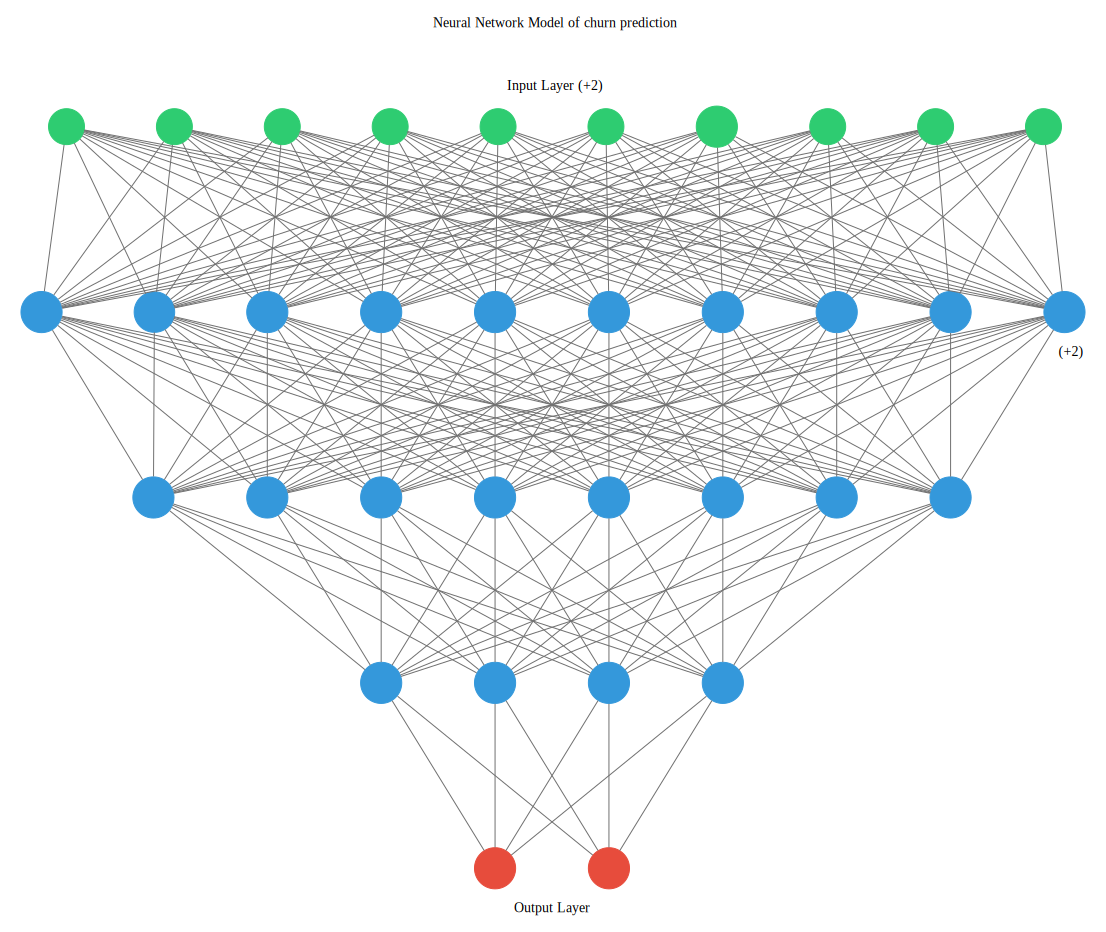

In [112]:
graph_source

# 8.3 Performance evaluation in Neural Network

In [117]:
test = []

for i in range(len(y_test)):
  test.append(np.argmax(y_test.values[i]))
pred = []

for i in range(len(dm_pred)):
  pred.append(np.argmax(dm_pred[i]))

In [118]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(test,pred))
print(classification_report(test,pred))


[[2556  444]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3000
           1       0.00      0.00      0.00         0

    accuracy                           0.85      3000
   macro avg       0.50      0.43      0.46      3000
weighted avg       1.00      0.85      0.92      3000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
y_test=pd.get_dummies(y_test)


In [144]:
history = model.fit(X_train, y_train,epochs=25, batch_size= 50,validation_data=(X_test,y_test))

Epoch 1/25
140/140 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.8700 - val_loss: 0.3666 - val_accuracy: 0.8553
Epoch 2/25
140/140 [==============================] - 0s 1ms/step - loss: 0.3087 - accuracy: 0.8734 - val_loss: 0.3661 - val_accuracy: 0.8530
Epoch 3/25
140/140 [==============================] - 0s 1ms/step - loss: 0.3082 - accuracy: 0.8710 - val_loss: 0.3682 - val_accuracy: 0.8553
Epoch 4/25
140/140 [==============================] - 0s 1ms/step - loss: 0.3085 - accuracy: 0.8723 - val_loss: 0.3665 - val_accuracy: 0.8550
Epoch 5/25
140/140 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.8721 - val_loss: 0.3648 - val_accuracy: 0.8547
Epoch 6/25
140/140 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8727 - val_loss: 0.3675 - val_accuracy: 0.8543
Epoch 7/25
140/140 [==============================] - 0s 2ms/step - loss: 0.3074 - accuracy: 0.8716 - val_loss: 0.3675 - val_accuracy: 0.8533
Epoch 

In [123]:
list=[X_train, y_train,X_test,y_test]
for i in list:
  print(i.shape)


(7000, 12)
(7000, 2)
(3000, 12)
(3000, 2)


# 8.4 Visualize Accuracy and Loss

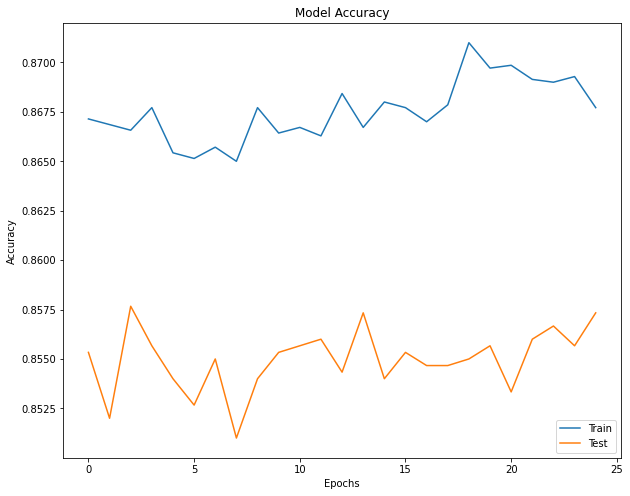

In [141]:
#To visualize accuracy and loss

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='lower right')

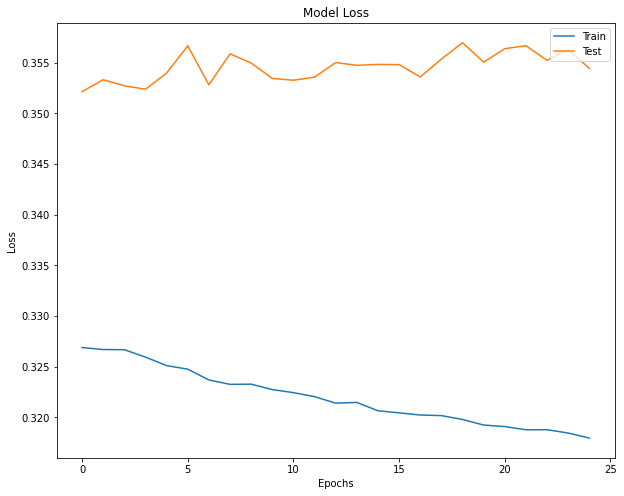

In [142]:
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper right')